In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(r"C:\Users\sirin\OneDrive\Bureau\Clean_Dataset.csv")

In [6]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [8]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [9]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [10]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [11]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [12]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [13]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [14]:
df['duration'].min()

0.83

In [15]:
df['duration'].max()

49.83

In [16]:
df['duration'].median()

11.25

In [17]:
#preprocessing

In [18]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)
df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [19]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,1,10.00,49,81585


In [20]:
df.stops=pd.factorize(df.stops)[0]

In [21]:
df.stops

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [22]:
df=df.join(pd.get_dummies(df.airline,prefix='airline')).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city,prefix='source')).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.destination_city,prefix='dest')).drop('destination_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time,prefix='arrival')).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.departure_time,prefix='departure')).drop('departure_time',axis=1)

In [23]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training regression model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x,y =df.drop('price',axis=1),df.price

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
reg=RandomForestRegressor(n_jobs=-1)
reg.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [27]:
reg.score(x_test,y_test)

0.9851550076942873

In [28]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

y_pred=reg.predict(x_test)

print('R2:' , r2_score(y_test,y_pred))
print('MAE:' , mean_absolute_error(y_test,y_pred))
print('MSE:' , mean_squared_error(y_test,y_pred))
print('RMSE:' , math.sqrt( mean_squared_error(y_test,y_pred)))

R2: 0.9851550076942873
MAE: 1079.7248702624254
MSE: 7661606.919676225
RMSE: 2767.9607872360157


Text(0.5, 1.0, 'Prediction vs Actual Price')

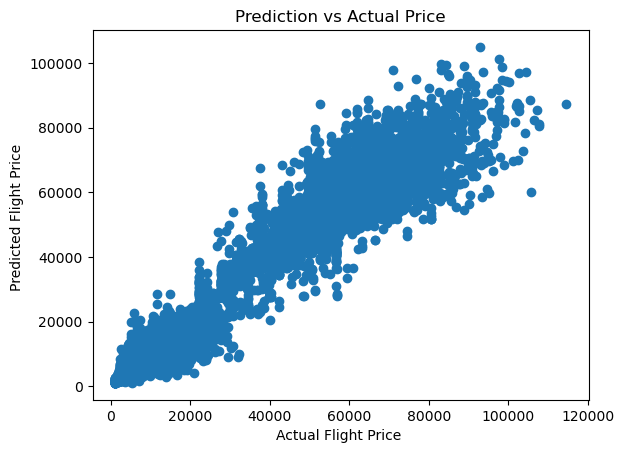

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price ')
plt.ylabel('Predicted Flight Price ')
plt.title('Prediction vs Actual Price')

In [30]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [33]:

importances=dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances=sorted(importances.items(),key=lambda x:x[1],reverse=True)
sorted_importances

[('class', 0.8797981342009068),
 ('duration', 0.05776659354318071),
 ('days_left', 0.018660598122119603),
 ('airline_Air_India', 0.005118889285273028),
 ('airline_Vistara', 0.004933003688053769),
 ('source_Delhi', 0.0034497745116433493),
 ('dest_Delhi', 0.0031379191289191435),
 ('source_Mumbai', 0.0021534161144488016),
 ('dest_Mumbai', 0.0019441070595131078),
 ('dest_Kolkata', 0.0018603549264868313),
 ('source_Kolkata', 0.0018375065120239493),
 ('stops', 0.001703004726723811),
 ('dest_Hyderabad', 0.001646757625592563),
 ('arrival_Evening', 0.0016171193733479472),
 ('source_Hyderabad', 0.0013683177313316259),
 ('dest_Bangalore', 0.0012178702433870631),
 ('arrival_Night', 0.001155488969343242),
 ('source_Bangalore', 0.0010677706411164483),
 ('departure_Evening', 0.0010263944202092469),
 ('arrival_Afternoon', 0.001012264922452645),
 ('source_Chennai', 0.000978077837030041),
 ('dest_Chennai', 0.0009671750154377591),
 ('departure_Morning', 0.0008968450178189316),
 ('departure_Early_Morning'

In [34]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

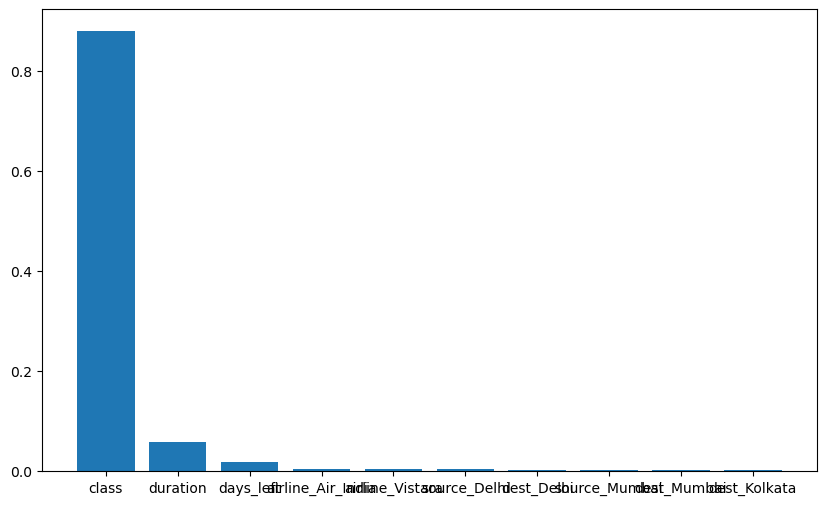

In [36]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV
reg=RandomForestRegressor(n_jobs=-1)

param_grid ={
 'n_estimators' [100,200,300],
  'max_depth':[None,10,20,30],
'min_samples_split':[2,5,10],
'min_samples_leaf':[1,2,4],
'max_features':['auto','sqrt']}
grid_search=GridSearchCV(estimator,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
best_params=grid_search.best_params_

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist={
    'n_estimators' :randint(100,300),
  'max_depth':[None,10,20,30,40,50],
'min_samples_split':randint(2,11),
'min_samples_leaf':randint(1,5),
'max_features':[1.0,'auto','sqrt']}
reg=RandomForestRegressor(n_jobs=-1)
random_search=RandomizedSearchCV(estimator=reg,param_distributions=param_dist,n_iter=2,cv=3,
                                 scoring='neg_mean_squared_error',verbose=2,random_state=10,
                                 n_jobs=-1)
random_search.fit(x_train,y_train)
best_regressor=random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\sirin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sirin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sirin\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sirin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sirin\anaconda3\Lib\site-packages\skl

In [41]:
best_regressor.score(x_test,y_test)

0.9861153319350103

Text(0.5, 1.0, 'Prediction vs Actual Price')

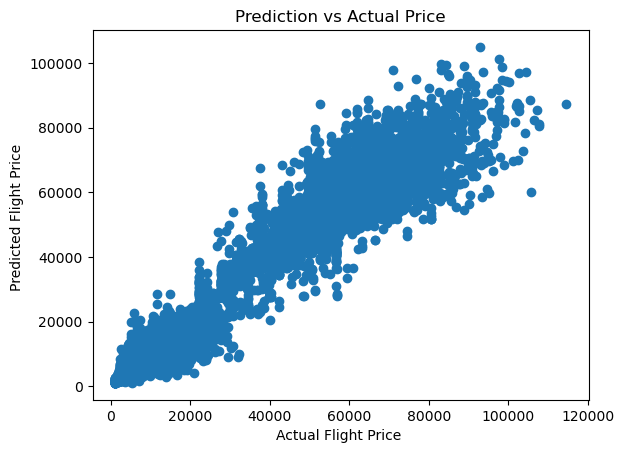

In [42]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Flight Price ')
plt.ylabel('Predicted Flight Price ')
plt.title('Prediction vs Actual Price')